In [2]:
NAME = "Ridwanur Rahman"
ID = "22301532"
SECTION = "09"

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [3]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

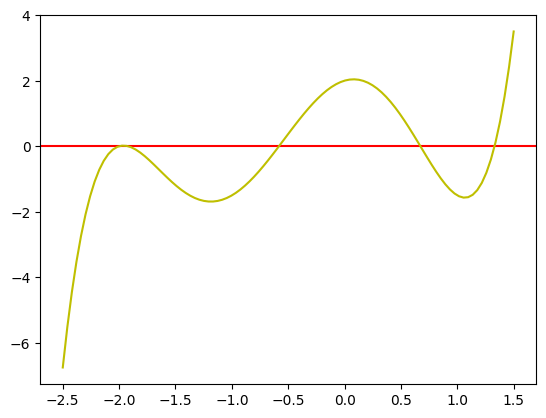

In [4]:
#1.a This cell should plot a graph. You must use polynomial class.
f_x = Polynomial([2.0,1.0,-6.0, -2.0,2.5,1.0 ])
x = np.linspace(-2.5,1.5,100)
y=f_x(x)
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')


1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴
Slope at point 0 is 1.0
Slope at point -1.18625 is -9.340808105218201e-06


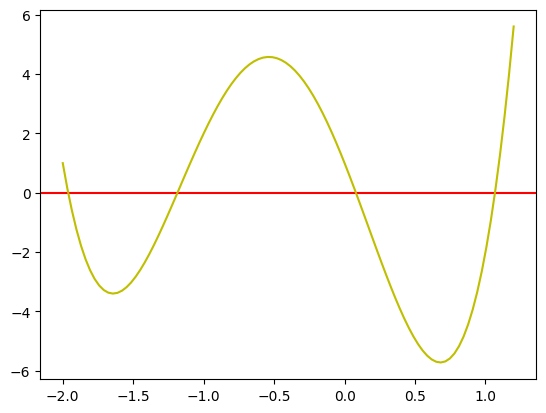

In [5]:
#1.b This cell should print and plot a graph.
f_prime = f_x.deriv(1)
print(f_prime)
xs1 = 0
xs2 = -1.18625
print("Slope at point 0 is", f_prime(xs1))
print("Slope at point -1.18625 is", f_prime(xs2))
xs = np.linspace(-2,1.2,100)
y_prime = f_prime(xs)
plt.axhline(y=0, color='r')
plt.plot(xs, y_prime,'y')

In [6]:
h = 0.1
xf1 = 0
xf2 = -1.18625
y = f_x

In [7]:
#1.c This cell should print
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h


slope1 = forward_diff(y,h,xf1)
slope2 = forward_diff(y,h,xf2)

print("Using forward differentiation the slope at point 0 is", slope1)

print("Using forward differentiation the slope at point -1.18625 is", slope2)

Using forward differentiation the slope at point 0 is 0.3826000000000018
Using forward differentiation the slope at point -1.18625 is 0.5520088838012782


In [8]:
#1.d This cell should print
def backward_diff(f, h, x):
    return (f(x) - f(x-h))/ h


slope1 = backward_diff(y,h,xf1)
slope2 = backward_diff(y,h,xf2)

print("Using backward differentiation the slope at point 0 is", slope1)

print("Using backward differentiation the slope at point -1.18625 is", slope2)

Using backward differentiation the slope at point 0 is 1.5776000000000012
Using backward differentiation the slope at point -1.18625 is -0.5476397529174859


In [9]:
#1.e This cell should print
def central_diff(f, h, x):
    return (f(x+h) - f(x-h))/ (2*h)


slope1 = central_diff(y,h,xf1)
slope2 = central_diff(y,h,xf2)

print("Using central differentiation the slope at point 0 is", slope1)

print("Using central differentiation the slope at point -1.18625 is", slope2)



Using central differentiation the slope at point 0 is 0.9801000000000015
Using central differentiation the slope at point -1.18625 is 0.002184565441896158


In [10]:
#1.f This cell should show a table
def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}     #
    #Write code here
    for i in x:
      actual =f_prime(i)
      fd = forward_diff(f,h,i)
      bd = backward_diff(f,h,i)
      cd = central_diff(f,h,i)
      Result['x'].append(i)
      Result['Actual'].append(actual)
      Result["FD"].append(fd)
      Result["BD"].append(bd)
      Result["CD"].append(cd)
      Result["FD Error"].append(abs(fd - actual))
      Result["BD Error"].append(abs(bd - actual))
      Result["CD Error"].append(abs(cd - actual))
    print(pd.DataFrame(Result))

compare(f_x,f_x.deriv(1),h,[0,-1.18625])

         x    Actual        FD       BD        CD  FD Error  BD Error  \
0  0.00000  1.000000  0.382600  1.57760  0.980100  0.617400   0.57760   
1 -1.18625 -0.000009  0.552009 -0.54764  0.002185  0.552018   0.54763   

   CD Error  
0  0.019900  
1  0.002194  


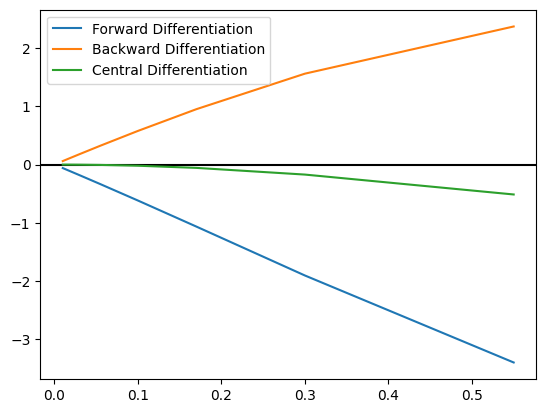

In [11]:
#1g This cell should plot a graph.

def error(f, f_prime, h, x):
    actual = f_prime(x)
    fd_error = np.array([])
    bd_error = np.array([])
    cd_error = np.array([])

    for h_i in h:

        fd_error_h_i = forward_diff(f, h_i, x) - actual
        fd_error = np.append(fd_error, fd_error_h_i)


        bd_error_h_i = backward_diff(f,h_i,x) - actual
        bd_error = np.append(bd_error,bd_error_h_i)

        cd_error_h_i = central_diff(f,h_i,x) - actual
        cd_error = np.append(cd_error,cd_error_h_i)


    return fd_error, bd_error, cd_error


new_h = np.array([0.55,0.3,0.17,0.1,0.055,0.03,0.017,0.01])
x_new = 0

final_error = error(f_x, f_x.deriv(1), new_h, 0)

fig, bx = plt.subplots()
bx.axhline(y=0, color='k')


bx.plot(new_h, final_error[0], label='Forward Differentiation')
bx.plot(new_h, final_error[1], label='Backward Differentiation')
bx.plot(new_h, final_error[2], label='Central Differentiation')
bx.legend()



# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [12]:
#2a. This cell should not have any output.
Proposed_Method_Name = ""

#Write Code here


In [13]:
#2b. This cell should print


In [14]:
#2c.This cell should print

def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    #Write code here


# compare1(#Write code here)

In [15]:
#2.d This cell should plot a graph.

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [16]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question
f_x = Polynomial([-10.0,-9.5,2.0,-(1/13)])
roots_exists = {}
for i in intervals:
  x1,x2 = i
  f_x1 = f_x(x1)
  f_x2 = f_x(x2)

  if f_x1 * f_x2 < 0:
    roots_exists[i] = True
  else:
    roots_exists[i] = False

print(roots_exists)

{(-20, -10): False, (-10, 0): True, (0, 10): True, (10, 20): True, (20, 30): False}


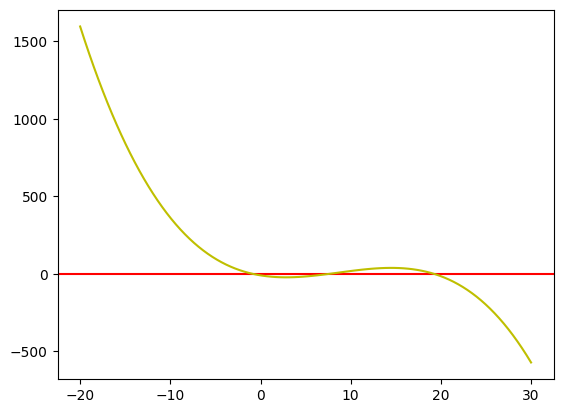

In [17]:
#3a_ii This cell should plot a graph.
x = np.linspace(-20,30,100)
y = f_x(x)


plt.axhline(y=0, color='r')
plt.plot(x, y, 'y')


b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [18]:
#3b This cell should print
def bisection_interval(f,a,b,error):

  m = (a+b)/2
  root = 0.0

  list_a = []
  list_b = []
  list_m = []
  list_f = []


  root_found = False
  while not root_found:
      list_a.append(a)
      list_b.append(b)
      list_m.append(m)
      list_f.append(f(m))
      if f(m) == 0:
        root = m
        root_found = True
        break
      elif f(m)*f(a) < 0:
        b = m
      else:
        a = m
      m_old = m
      m = (a+b)/2
      if abs((m-m_old)/m) <= error:
        root = m
        root_found = True

  return root

e = 1e-6
roots=[]
for i in roots_exists.items():
  if i[1] == True:
    roots.append(bisection_interval(f_x,i[0][0],i[0][1],e))

print(roots)


[-0.8829361200332642, 7.658982276916504, 19.223957061767578]


c. Plot the f(x) along with the roots to check if your method is working correctly.

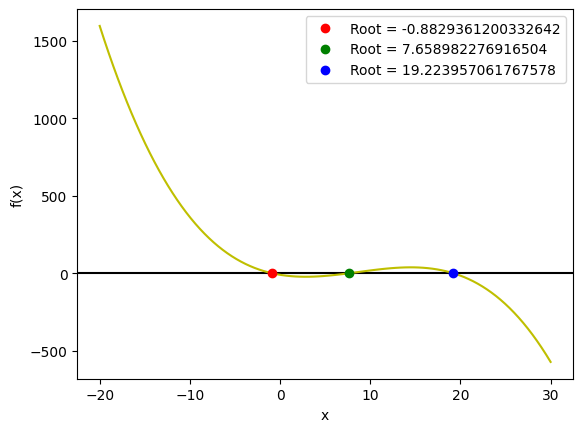

In [19]:
#3c This cell plot a graph.
x = np.linspace(-20,30,100)
y = f_x(x)

fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

bx.set_xlabel('x')
bx.set_ylabel('f(x)')


bx.plot(x,y,'y')
bx.plot(roots[0], f_x(roots[0]), 'ro',label = "Root = -0.8829361200332642")
bx.plot(roots[1], f_x(roots[1]), 'go', label = "Root = 7.658982276916504")
bx.plot(roots[2], f_x(roots[2]), "bo", label = "Root = 19.223957061767578")

bx.legend()


Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [23]:
#4a This cell should print
f_x = Polynomial([2.0,0.5,-6,-2,2.5,1])
roots = np.roots([1, 2.5, -2, -6, 0.5, 2])
print(roots)


[-2.22027583  1.37526761 -1.61803399  0.61803399 -0.65499178]


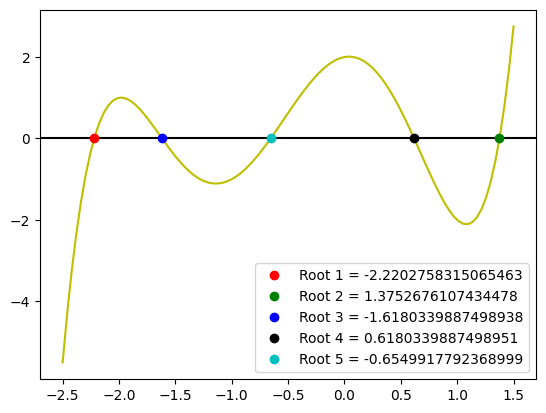

In [24]:
#4b This cell should print plot a graph
x = np.linspace(-2.5,1.5,100)
y = f_x(x)

fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

colors = ['ro', 'go', 'bo', 'ko', 'co']

bx.plot(x,y,'y')
for i in range(len(roots)):
  c = colors[i]
  bx.plot(roots[i], f_x(roots[i]), c ,label= f'Root {i+1} = {roots[i]}')

bx.legend()

In [30]:
#4c This cell should print
# def gx_1(x):
#   f = Polynomial([-2.0,0.0,6.0,2.0,-2.5,-1.0])
#   return (f(x)/2)

gx_1 = Polynomial([-2.0,0.0,6.0,2.0,-2.5,-1.0])
gx_1_prime = gx_1.deriv(1)

gx_lambda = []

for i in roots:
  gx_lambda.append(gx_1_prime(i))

print(gx_lambda)


[-9.120295828020359, -16.04613009884968, 4.381966011250102, 6.618033988749896, -3.396074073129954]


In [ ]:
#4d This cell should print


In [ ]:
#4e This cell have no outputs


In [ ]:
#4f This cell should print

In [ ]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.